# Heart Failure Prediction Dataset

https://www.kaggle.com/fedesoriano/heart-failure-prediction

## Table of Contents

1. Foreseeing Variable Problems When Building ML Models <br>
2. Imputing Missing data <br>
3. Handling Outliers <br>
4. Scaling Quantitative Variables <br>
5. Encoding Categorical Variables <br>
6. Transformation Pipeline <br>
7. Models Evaluation <br>
8. Hyperparameters Tuning and Model Selection <br>
9. Precision-Recall Trade-off <br>
10. Models Comparison

## Dataset Decription

### Context

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

#### Attribute Information

1. Age: age of the patient (years) <br>
2. Sex: sex of the patient <br>
&nbsp; &nbsp; M: Male <br>
&nbsp; &nbsp; F: Female <br>
3. ChestPainType: chest pain type <br>
&nbsp; &nbsp; TA: Typical Angina <br>
&nbsp; &nbsp; ATA: Atypical Angina <br>
&nbsp; &nbsp; NAP: Non-Anginal Pain <br>
&nbsp; &nbsp; ASY: Asymptomatic <br>
4. RestingBP: resting blood pressure (mm Hg) <br>
5. Cholesterol: serum cholesterol (mg/dl) <br>
6. FastingBS: fasting blood sugar <br>
&nbsp; &nbsp; 1: if FastingBS > 120 mg/dl <br>
&nbsp; &nbsp; 0: otherwise <br>
7. RestingECG: resting electrocardiogram results <br>
&nbsp; &nbsp; Normal: Normal <br>
&nbsp; &nbsp; ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br>
&nbsp; &nbsp; LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] <br>
8. MaxHR: maximum heart rate achieved (Numeric value between 60 and 202) <br>
9. ExerciseAngina: exercise-induced angina <br>
&nbsp; &nbsp; Y: Yes <br>
&nbsp; &nbsp; N: No <br>
10. Oldpeak: oldpeak = ST (Numeric value measured in depression) <br>
11. ST_Slope: the slope of the peak exercise ST segment <br>
&nbsp; &nbsp; Up: upsloping <br>
&nbsp; &nbsp; Flat: flat <br>
&nbsp; &nbsp; Down: downsloping] <br>
12. HeartDisease: output class <br>
&nbsp; &nbsp; 1: Heart disease <br>
&nbsp; &nbsp; 0: Normal <br>

#### Source

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations <br>
Hungarian: 294 observations <br>
Switzerland: 123 observations <br>
Long Beach VA: 200 observations <br>
Stalog (Heart) Data Set: 270 observations <br>

Total: 1190 observations <br>
Duplicated: 272 observations <br>

Final dataset: 918 observations <br>

## Loading Libraries, Customizing Color Theme, Loading and Splitting Data

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import tensorflow as tf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import random
import math
import time
import os

from scipy import stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import train_test_split
# from sklearn.impute import KNNImputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from feature_engine.imputation import MeanMedianImputer
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import OrdinalEncoder
from feature_engine.encoding import MeanEncoder
from feature_engine.encoding import WoEEncoder
from feature_engine.encoding import OrdinalEncoder
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.discretisation import ArbitraryDiscretiser
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Recall

2023-02-15 08:29:45.989020: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
time_start_script = time.time()

### Customizing Color Theme, etc.

In [3]:
palette = ['#6D9BC3', '#AF4035', '#00937F', '#E7DD73', '#7B5141',
           '#4A4E69', '#B86A84', '#587B7F', '#9DA3A6', '#505050']

pairplot = ['#8DB4D7', '#AF4035']
corr_matrix = ['#5691C4', '#78A7D0', '#9ABDDC', '#BBD3E7', '#DDE9F3', 
               '#FFFFFF', '#F2DEDE', '#EBCCCC', '#D79999', '#C46666', '#B74747']
con_matrix = ['#FCFCFC', '#F8F8F8', '#D3D3D3', '#CCCCCC', '#9D9D9D', 
              '#8D8D8D', '#7D7D7D', '#606060', '#505050']
clf_report = ['#E6E9EC', '#EBEDF0', '#F0F2F4', '#F5F6F7', '#FAFBFB', 
          '#FFFFFF', '#ECD4D5', '#D8AAAA', '#C57F80', '#B15555', 
          '#9E2A2B']
gradient_grey = ['#FCFCFC', '#F8F8F8', '#D3D3D3', '#CCCCCC', 
                 '#9D9D9D', '#8D8D8D', '#7D7D7D', '#606060', '#505050']

In [4]:
custom_params = {
    'figure.figsize': (6, 4), # ширина и высота в дюймах
    'axes.titlesize': 13, # заголовок
    'axes.labelsize': 13, # оси
    'xtick.labelsize': 11, # деления оси X
    'ytick.labelsize': 11, # деления оси Y
    'axes.spines.left': False, # не отображать ось Y
    'axes.spines.right': False, # не отображать правую рамку 
    'axes.spines.top': False, # не отображать верхнюю рамку
    'axes.spines.bottom': True, # отображать нижнюю рамку
    'grid.color': '0.9',
    'grid.linestyle': ':',
    'lines.linewidth': 2,
}

sns.set_theme(style='whitegrid', palette=palette, rc=custom_params)

%matplotlib inline

seed = 42

### Data Load

In [5]:
data_raw = pd.read_csv('heart.csv')

In [6]:
# целевая переменная
data_raw = data_raw.rename(columns={'HeartDisease': 'hd'})
data_raw.loc[data_raw['hd'] == '1', 'hd'] = 1
data_raw.loc[data_raw['hd'] == '0', 'hd'] = 0

# строчные названия признаков
data_raw.columns = map(str.lower, data_raw.columns)

# колонка 'id'
# data_raw = data_raw.reset_index().rename(columns = {'index': 'id'})

In [7]:
data_raw.head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,hd
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Train Test Split

#### Train and Test Datasets

In [8]:
data_train, data_test = train_test_split(data_raw,
                                         test_size=0.1,
                                         random_state=seed)

In [9]:
print(data_train.shape, data_test.shape)

(826, 12) (92, 12)


#### Predictors and Target Datasets

In [10]:
x_train = data_train.loc[:, data_train.columns != 'hd'].copy()
y_train = data_train['hd'].values.copy()

x_test = data_test.loc[:, data_test.columns != 'hd'].copy()
y_test = data_test['hd'].values.copy()

#### Dataset for Exploration

In [11]:
data = data_train.copy()

## 1. Foreseeing Variable Problems When Building ML Models

In [12]:
def df_describe_create(df):
    
    df_missing_data = pd.concat([
        df.dtypes.rename('Type').to_frame(),
        df.count().rename('Count').to_frame(),
        df.nunique().rename('Unique').to_frame(),
        df.isnull().sum().rename('Missing').to_frame(),
        df.isnull().mean().round(2).rename('Percentages').to_frame()
    ], axis=1)
    
    df_missing_data['Percentages'] = df_missing_data['Percentages'] * 100
    df_missing_data['Percentages'] = df_missing_data['Percentages'].astype('int64')
    
    df_missing_data = df_missing_data.sort_values('Type')
    
    return df_missing_data


def df_outliers_create(df, quant_features, scale=1.5, boundaries=False):
    
    index = ['Count', 
             'Outliers', 'Lower Outliers', 'Upper Outliers',
             'Lower Fence', 'Upper Fence', 
             'Q25', 'Q75', 'IQR', 'Scale']
    
    boundaries_dict = {}
    
    # словарь, в котором ключи - признаки,
    # а значения - верхние и нижние выбросы, а также q25, q75, iqr, lower, upper, scale
    outliers_dict = {}
    
    for feature in quant_features:
        
        q25, q75 = np.nanpercentile(df[feature], [25,75])
        iqr = q75 - q25
        lower_boundary = q25 - (scale * iqr)
        upper_boundary = q75 + (scale * iqr)
        
        lower_ouliers = len(df[df[feature] < lower_boundary])
        upper_outliers = len(df[df[feature] > upper_boundary])
        outliers = lower_ouliers + upper_outliers

        outliers_dict['{0}'.format(feature)] = \
                [round(i, 2) for i in [df[feature].count(), # общее число элементов признака i
                                       outliers, lower_ouliers, upper_outliers,
                                       lower_boundary, upper_boundary,
                                       q25, q75, iqr,  scale]]
        
        boundaries_dict[feature] = [lower_boundary, upper_boundary]
    
    outliers_df = pd.DataFrame(outliers_dict, index=index)
    
    if boundaries:
        return outliers_df, boundaries_dict
    else:
        return outliers_df


def df_balance_create(df, target_feature, r=2):
    
    positive_count = df.loc[df[target_feature] == 1, target_feature].count()
    positive_perc = round(positive_count / len(df[target_feature]), r)
    
    negative_count = df.loc[df[target_feature] == 0, target_feature].count()
    negative_perc = round(negative_count / len(df[target_feature]), r)
    
    divide = positive_count / negative_count
    
    fig, ax = plt.subplots(figsize=(2.2, 3))
    
    sns.countplot(
        data=df,
        x=target_feature,
        width=0.7,
        saturation=1
    )
    
    ax.tick_params(axis='both', which='major', labelsize=9)
    ax.set_ylabel('Count', fontsize=10, weight='bold')
    ax.set_xlabel(target_feature.title(), fontsize=10, weight='bold')
    
    plt.show()
    
    print('Total: {}'.format(df.loc[df[target_feature] == 1, target_feature].count() +
                             df.loc[df[target_feature] == 0, target_feature].count()), '\n')

    print('Positive: {0} ({1}%)'.format(positive_count, positive_perc))
    print('Negative: {0} ({1}%)'.format(negative_count, negative_perc), '\n')
    
    print('Positive / Negative: {0:.2f}'.format(divide))
    
    
def plot_data_outliers(df_outliers):
    
    plt.figure(figsize=(6,3))

    ax = sns.barplot(
        x = df_outliers.columns,
        y = df_outliers.loc['Outliers'] / df_outliers.loc['Count'] * 100,
        color=palette[0],
        saturation=1,
        width=0.6
    )

    ax.tick_params(axis='both', which='major', labelsize=9)
    ax.set_ylabel('Persentages', fontsize=10, weight='bold')
    ax.yaxis.set_label_coords(-0.11,0.46)
    plt.title('Outliers', fontsize=10, weight='bold')
    plt.xticks(rotation=90)

    plt.show()

### Identifying quantitative and categorical variables

#### Dataset Overview

In [13]:
data.shape

(826, 12)

In [14]:
data.head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,hd
557,56,M,NAP,137,208,1,ST,122,Y,1.8,Flat,1
260,46,M,ATA,140,275,0,Normal,165,Y,0.0,Up,0
235,39,M,ATA,120,200,0,Normal,160,Y,1.0,Flat,0
218,55,M,ATA,140,196,0,Normal,150,N,0.0,Up,0
382,43,M,ASY,115,0,0,Normal,145,Y,2.0,Flat,1


In [15]:
# quantitative
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,826.0,53.478208,9.365708,29.0,47.00,54.0,60.0,77.0
restingbp,826.0,132.530266,18.449924,0.0,120.00,130.0,140.0,200.0
cholesterol,826.0,197.809927,108.421172,0.0,173.25,222.0,267.0,603.0
fastingbs,826.0,0.230024,0.421103,0.0,0.00,0.0,0.0,1.0
maxhr,826.0,136.312349,25.286610,60.0,118.25,138.0,155.0,202.0
oldpeak,826.0,0.886441,1.070139,-2.6,0.00,0.5,1.5,6.2
hd,826.0,0.549637,0.497832,0.0,0.00,1.0,1.0,1.0


In [16]:
# categorical
data.describe(include=object).T

,count,unique,top,freq
sex,826,2,M,646
chestpaintype,826,4,ASY,451
restingecg,826,3,Normal,506
exerciseangina,826,2,N,488
st_slope,826,3,Flat,418


#### Creating Variables Lists

In [17]:
data['fastingbs'].unique()

array([1, 0])

In [18]:
data.loc[data['fastingbs'] == 1, 'fastingbs'] = 'Yes'
data.loc[data['fastingbs'] == 0, 'fastingbs'] = 'No'

In [19]:
# целевая переменная
features_target = 'hd'

# количественные переменные
features_quantitative = x_train.select_dtypes(include=['int64', 'float64']) \
                               .columns.to_list()

# категориальные переменные
features_categorical = x_train.select_dtypes(include=['object', 'bool']) \
                              .columns.to_list()

quantitative_to_categorical = 'fastingbs'
features_quantitative.remove(quantitative_to_categorical)
features_categorical.append(quantitative_to_categorical)

features_overall = features_quantitative + features_categorical

In [20]:
# проверка (результат должен быть равен 0)
len(x_train.columns) - len(features_quantitative) - len(features_categorical)

0

In [21]:
features_quantitative

['age', 'restingbp', 'cholesterol', 'maxhr', 'oldpeak']

In [22]:
features_categorical

['sex',
 'chestpaintype',
 'restingecg',
 'exerciseangina',
 'st_slope',
 'fastingbs']

In [23]:
features_target

'hd'

#### Balance

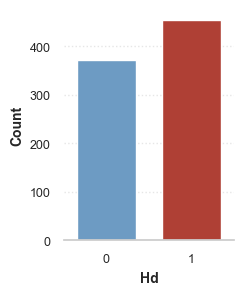

Total: 826 

Positive: 454 (0.55%)
Negative: 372 (0.45%) 

Positive / Negative: 1.22


In [24]:
df_balance_create(data, features_target)

#### Visualization

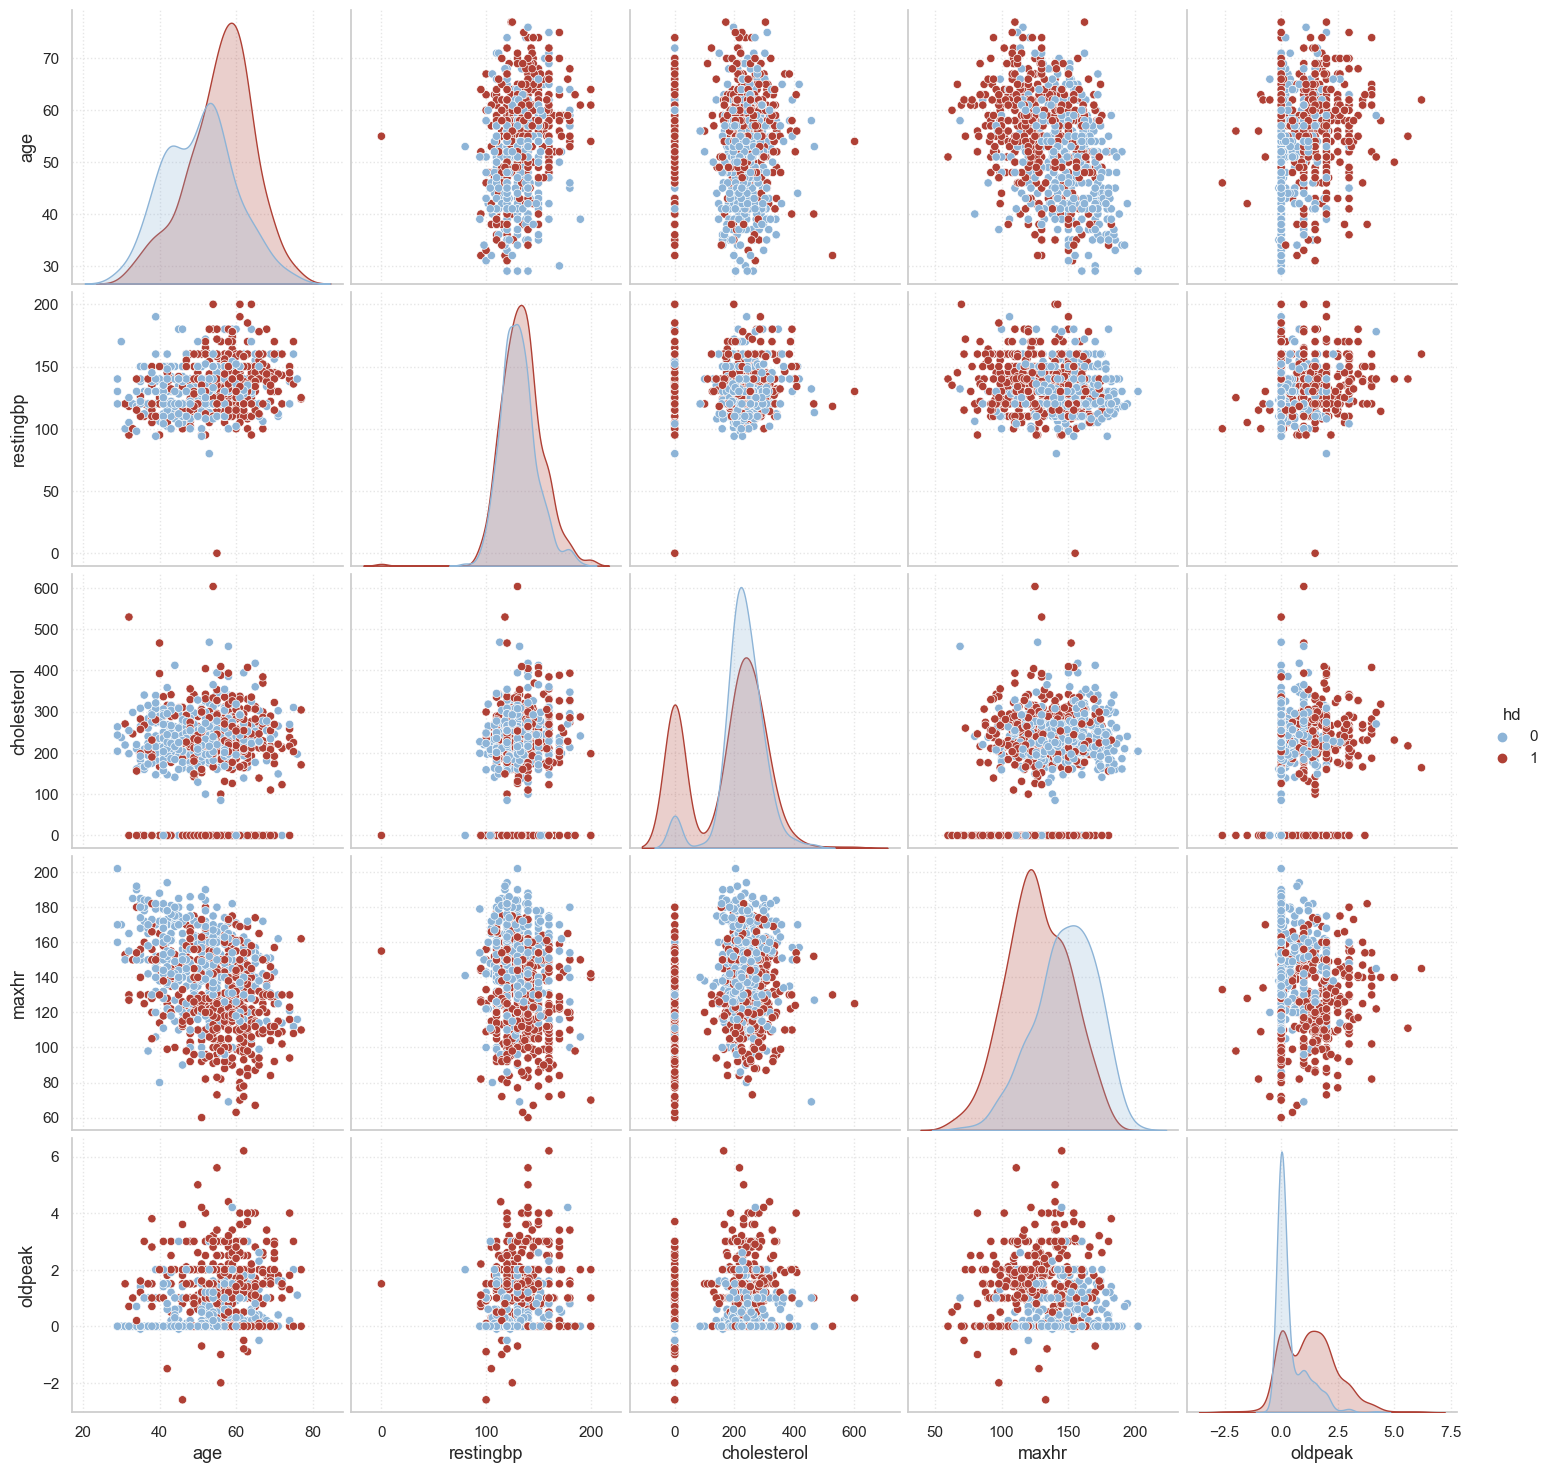

In [25]:
sns.pairplot(
    data=data, hue='hd',
    palette=sns.color_palette(pairplot, 2),
    diag_kind='kde', height=3
);

#### Missing Data

In [26]:
df_missing_data = df_describe_create(data)

In [27]:
df_missing_data

,Type,Count,Unique,Missing,Percentages
age,int64,826,48,0,0
restingbp,int64,826,64,0,0
cholesterol,int64,826,212,0,0
maxhr,int64,826,116,0,0
hd,int64,826,2,0,0
oldpeak,float64,826,51,0,0
sex,object,826,2,0,0
chestpaintype,object,826,4,0,0
fastingbs,object,826,2,0,0
restingecg,object,826,3,0,0


#### Highlighting Outliers

In [28]:
scale = 1.5

In [29]:
outliers_df = df_outliers_create(data, features_quantitative, scale=scale, boundaries=False)

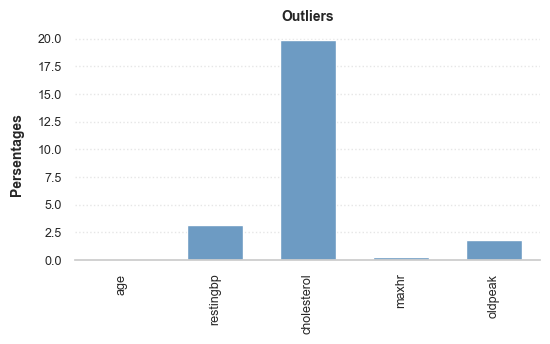

In [30]:
plot_data_outliers(outliers_df)

In [31]:
outliers_df

,age,restingbp,cholesterol,maxhr,oldpeak
Count,826.0,826.0,826.00,826.00,826.00
Outliers,0.0,26.0,164.00,2.00,15.00
Lower Outliers,0.0,2.0,156.00,2.00,1.00
Upper Outliers,0.0,24.0,8.00,0.00,14.00
Lower Fence,27.5,90.0,32.62,63.12,-2.25
Upper Fence,79.5,170.0,407.62,210.12,3.75
Q25,47.0,120.0,173.25,118.25,0.00
Q75,60.0,140.0,267.00,155.00,1.50
IQR,13.0,20.0,93.75,36.75,1.50
Scale,1.5,1.5,1.50,1.50,1.50


### Quantitative Variables Exploration

In [32]:
def plot_data_hisplot(df, features_list):
    
    n = math.ceil(len(features_list) / 2) 
    m = 0
    
    plt.figure(figsize=(15,10))
    plt.subplots_adjust(wspace=0.2, hspace=0.4)
    
    for feature in features_list:
        
        plt.subplot(n,2,features_list.index(feature)+1)
        plt.title(feature.title(), fontsize=12, weight='bold')

        ax = sns.histplot(
            data=df, x=feature, hue='hd',
            bins=40, kde=True, alpha=0.75
        );

        ax.tick_params(axis='both', which='major', labelsize=9)
        ax.set_xlabel(None)
        ax.set_ylabel('Count', fontsize=10, weight='bold')
        ax.yaxis.set_label_coords(-0.11,0.46)
        sns.move_legend(ax, title='Hd', loc='best')
        
        if m != 0:
            ax.get_legend().remove()
        
        m += 1
        
    plt.show()


def plot_data_pointplot(df, features_list):
    
    n = math.ceil(len(features_list) / 2)    
    plt.figure(figsize=(15,10))
    plt.subplots_adjust(wspace=0.2, hspace=0.4)
    
    for feature in features_list:

        plt.subplot(n,2,features_list.index(feature)+1)
        
        ax = sns.pointplot(
            data=data,
            x='hd',
            y=feature,
            hue='hd',
            errorbar='sd',
            scale=0.7,
            errwidth=2,
            capsize=0.03
            )
        
        ax.tick_params(axis='y', which='major', labelsize=9)
        ax.set(xlabel=None)
        ax.set_xticklabels(ax.get_xticks(), weight='bold', size=10)
        ax.set_ylabel(feature.title(), fontsize=10, weight='bold')
        ax.yaxis.set_label_coords(-0.11,0.46)
        
        plt.legend([],[], frameon=False)

#### Variables Distribution

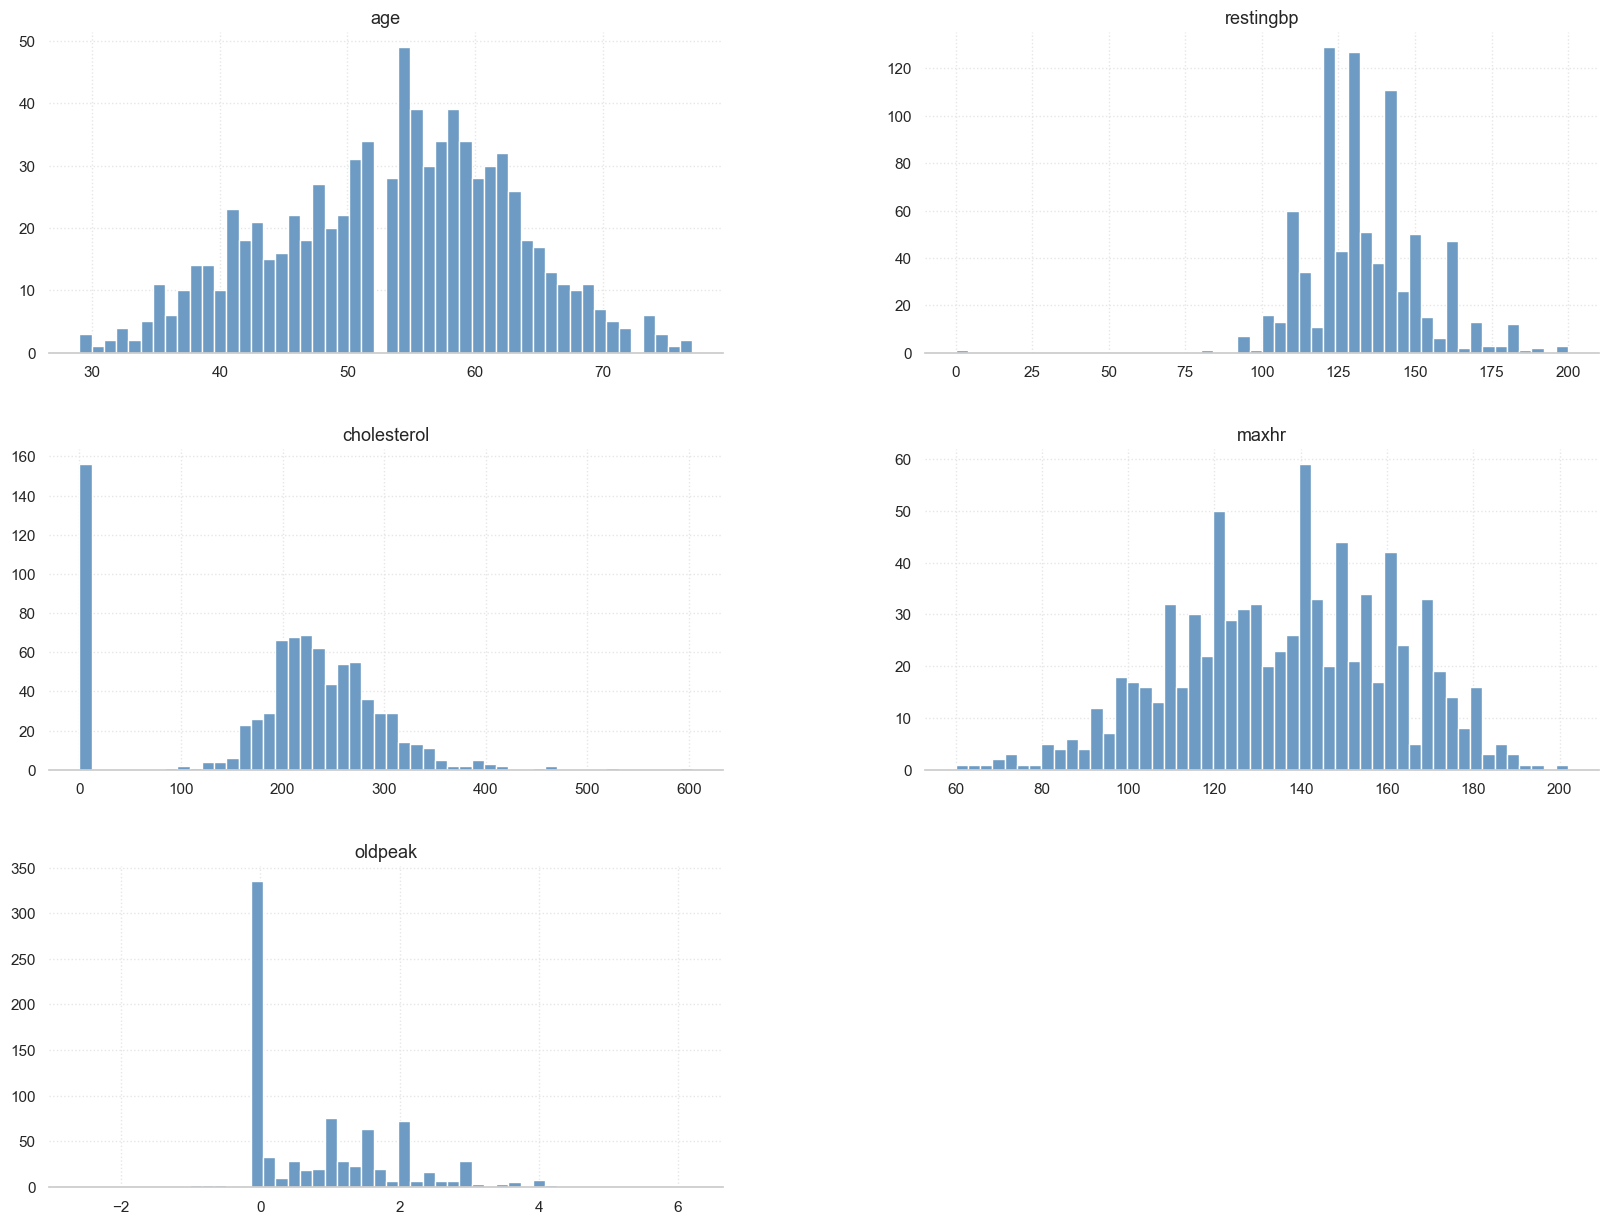

In [33]:
data[features_quantitative].hist(figsize=(20, 15), bins=50);

#### Visualization due Target Variable 

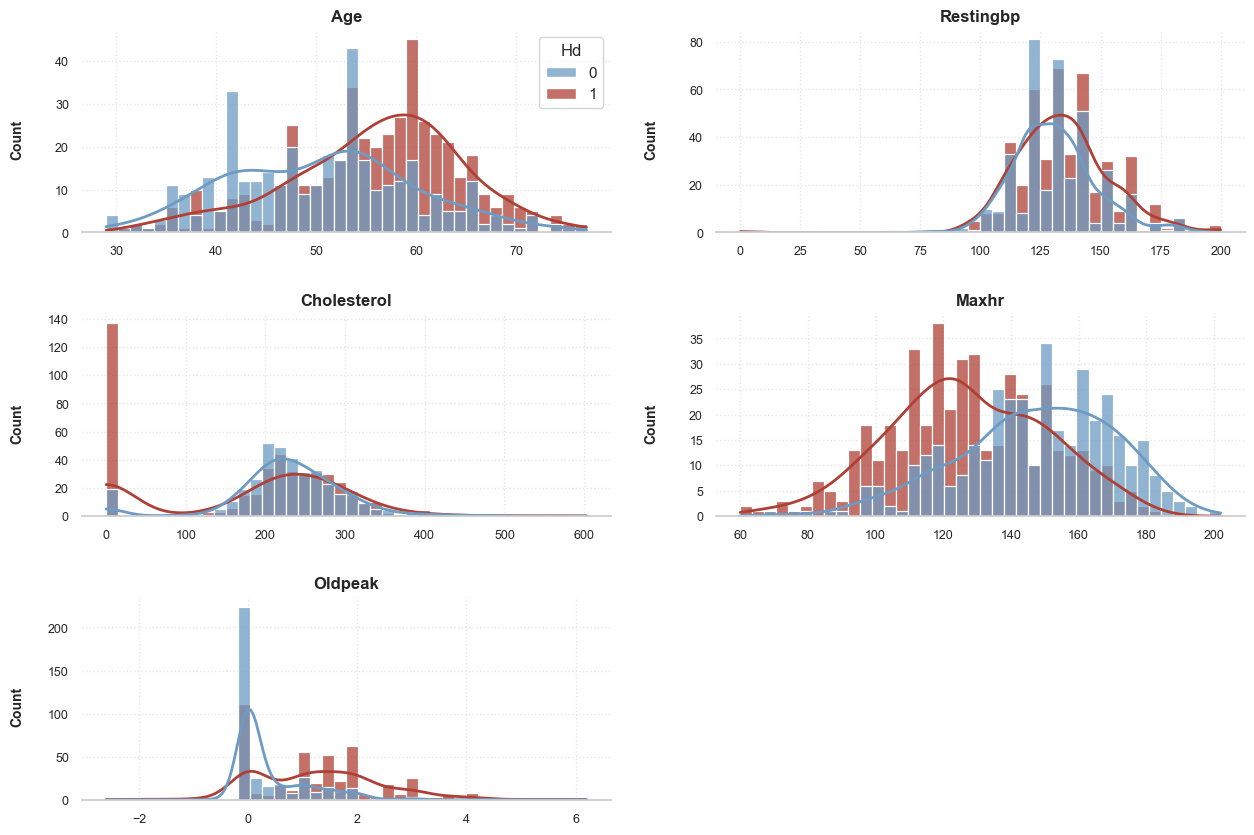

In [34]:
plot_data_hisplot(data, features_quantitative)

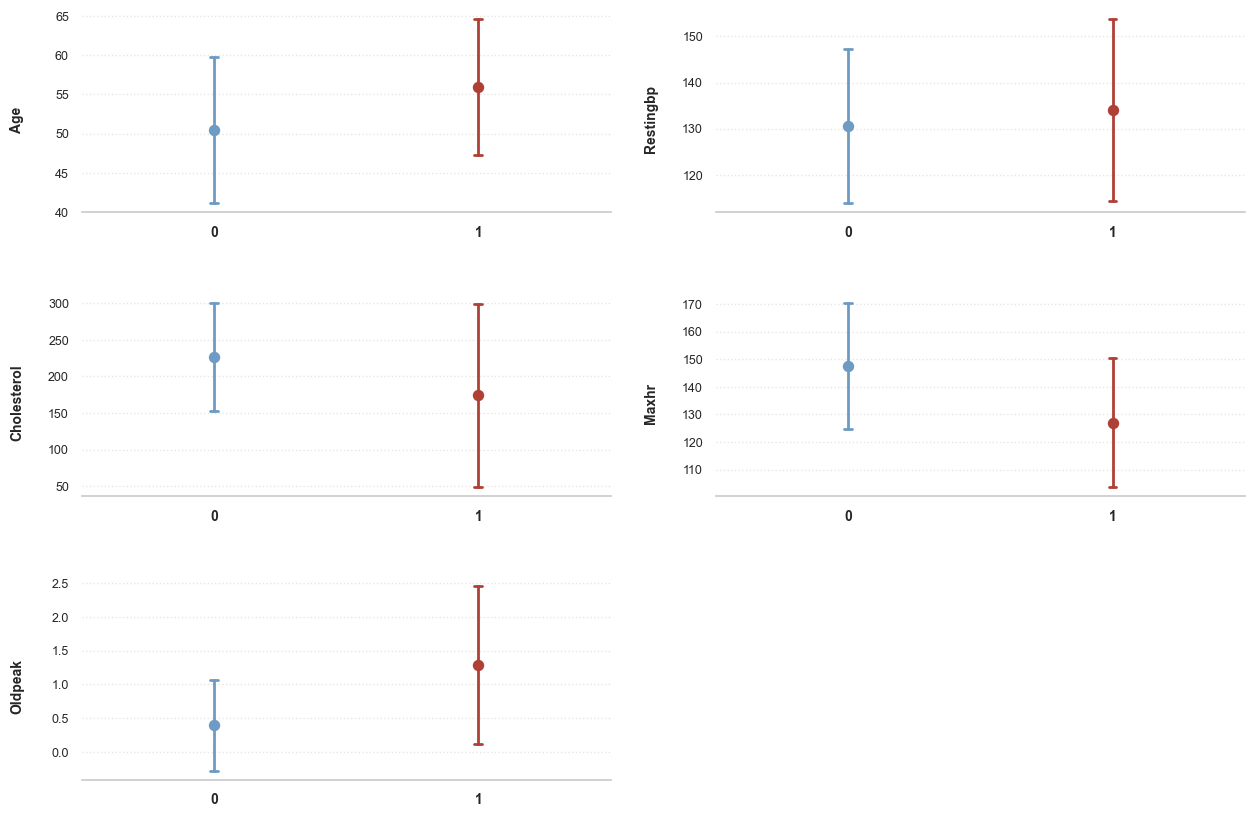

In [35]:
plot_data_pointplot(data, features_quantitative)

#### Comparing feature magnitude

Many machine learning algorithms are sensitive to the scale of the features. <br>
For example, the coefficients of linear models are directly informed by the scale of the feature. In addition, features with bigger value ranges tend to dominate over features with smaller ranges.

In [36]:
data[features_quantitative].max() - data[features_quantitative].min()

age             48.0
restingbp      200.0
cholesterol    603.0
maxhr          142.0
oldpeak          8.8
dtype: float64

Calculate the value range of each variable, that is, the difference between the maximum and minimum value. <br>
The value ranges of the variables are quite different.

### Categorical Variables Exploration

In [37]:
def plot_data_countplot(df, features_list):

    n = math.ceil(len(features_list) / 2)
    plt.figure(figsize=(12,10))
    m = 0
    
    for feature in features_list:
        
        u = df[feature].nunique()
        if u < 3:
            width = 0.3
        else:
            width = 0.5
    
        plt.subplot(n,2,features_list.index(feature)+1)
        plt.subplots_adjust(wspace=0.2, hspace=0.4)
    
        ax = sns.histplot(
            data=data, x=feature, hue='hd',
            multiple='stack', shrink=width, alpha=1
        )
        
        ax.set_title('{0}'.format(feature.title()), fontsize=10, weight='bold')
        ax.tick_params(axis='both', which='major', labelsize=9)
        ax.set(xlabel=None)
        ax.yaxis.set_label_coords(-0.11,0.46)
        ax.set_ylabel('Count', fontsize=10, weight='bold')
        
        if m != 0:
            ax.get_legend().remove()
        
        m += 1
        
    plt.show()


def plot_variables_categories(df, features_list):

    n = math.ceil(len(features_list) / 2)
    plt.figure(figsize=(12,10))
    
    for feature in features_list:
        
        u = df[feature].nunique()
        
        if u < 3:
            width = 0.2
        else:
            width = 0.5
    
        plt.subplot(n,2,features_list.index(feature)+1)
        plt.subplots_adjust(wspace=0.2, hspace=0.4)
        plt.title(feature.title(), fontsize=12, weight='bold')
    
        label_freq = df[feature].value_counts() / len(df) * 100
        label_freq = label_freq.sort_values(ascending=False).to_frame().T

        ax = sns.barplot(data=label_freq, color=palette[0], width=width)
        
        ax.axhline(y=5, color=palette[1], linewidth=0.5)
        
        ax.yaxis.set_label_coords(-0.11,0.46)
        ax.set_ylabel('%', fontsize=12, weight='bold')

        ax.set_title('{0}'.format(feature.title()),
                     fontsize=10, weight='bold')
        
        ax.tick_params(axis='both', which='major', labelsize=9)
        
    plt.show()
    

def df_categories_create(df, features_categorical):

    df_categories = pd.DataFrame()

    for feature in features_categorical:

        label_freq = df[feature].value_counts() / len(df) * 100
        label_freq = label_freq.to_frame()

        df_categories_per_feat = pd.DataFrame()

        df_categories_per_feat['Value'] = label_freq.index
        df_categories_per_feat['Feature'] = feature
        df_categories_per_feat['Percentages'] = label_freq[feature].values

        df_categories = pd.concat([
            df_categories,
            df_categories_per_feat],
            axis=0
        )

    df_categories['Rare'] = False
    df_categories.loc[df_categories['Percentages'] < 5, 'Rare'] = True
    df_categories = df_categories.sort_values('Percentages', ascending=True)
    
    return df_categories

#### Visualization due Target Variable 

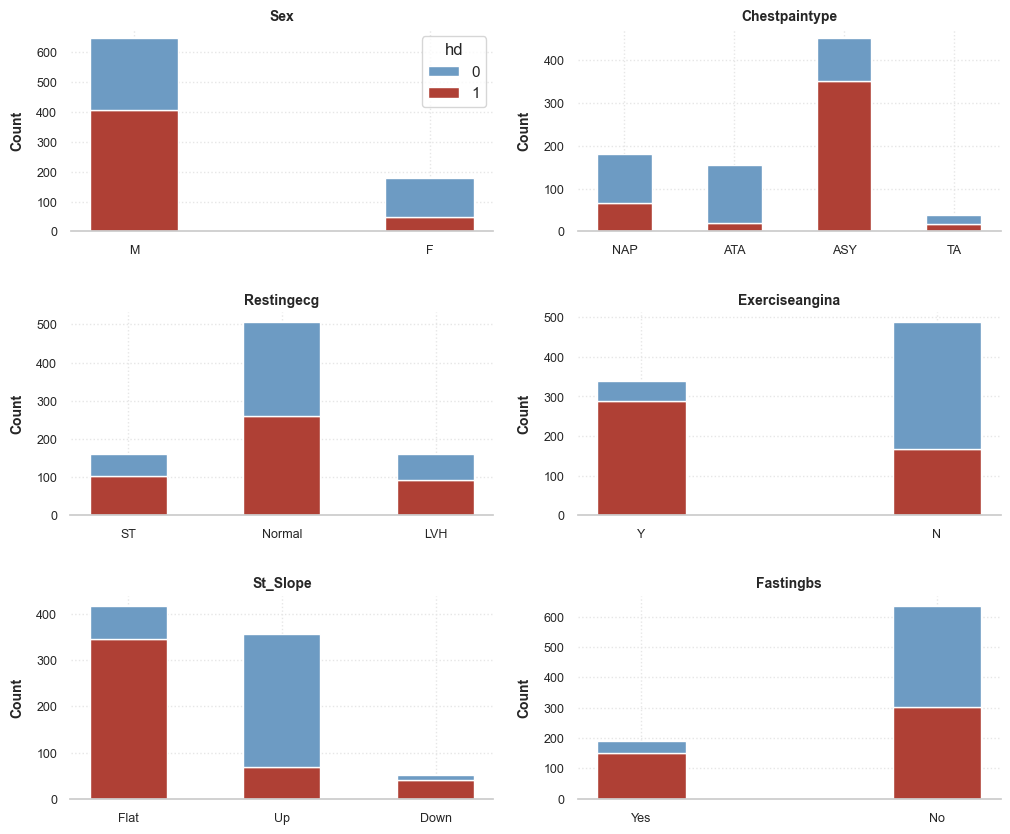

In [38]:
plot_data_countplot(data, features_categorical)

#### Cardinality

In [39]:
df_cardinality = data[features_categorical].nunique() \
                                           .to_frame() \
                                           .rename(columns = {0: 'Cardinality'})

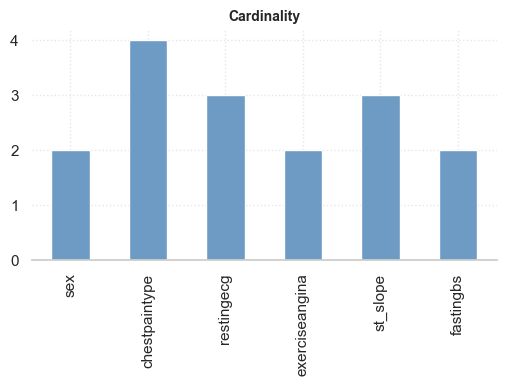

In [40]:
df_cardinality.plot.bar(figsize=(6,3), legend=None)

plt.title('Cardinality', fontsize=10, weight='bold')
plt.show()

In [41]:
df_cardinality

,Cardinality
sex,2
chestpaintype,4
restingecg,3
exerciseangina,2
st_slope,3
fastingbs,2


#### Rare Categories

Typically, we consider a label to be rare when it appears in **less than 5% or 1%** of the population.

In [42]:
df_categories = df_categories_create(data, features_categorical)

In [43]:
df_categories.head()

,Value,Feature,Percentages,Rare
3,TA,chestpaintype,4.600484,True
2,Down,st_slope,6.295400,False
2,ATA,chestpaintype,18.765133,False
1,ST,restingecg,19.370460,False
2,LVH,restingecg,19.370460,False


### Correlations and Multicollinearity

In [44]:
def corr_matrix_plot(df, variables, figsize=(5, 5)):

    corr = df[variables].corr()
    cmap = corr_matrix

    f, ax = plt.subplots(figsize=figsize)

    sns.heatmap(corr,
                cmap=cmap, annot=True, vmax=1, vmin=-1,
                center=0, square=True, linewidths=.5,
                annot_kws={'size': 9}, cbar_kws={'shrink': 0.6, 'pad': 0.1})

    plt.xticks(size=9)
    plt.yticks(size=9)

    plt.show()

def vif(exogs, data):

    vif_dict, tolerance_dict = {}, {}

    # разбиваем данные на экзогенные и эндогенные переменные
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        X, y = data[not_exog], data[exog]

        r_squared = LinearRegression().fit(X, y).score(X, y)

        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})
    df_vif = df_vif.sort_values('VIF', ascending=0)
    
    return df_vif

#### Correlation Matrix

In [45]:
variables_corr = features_quantitative + [features_target]

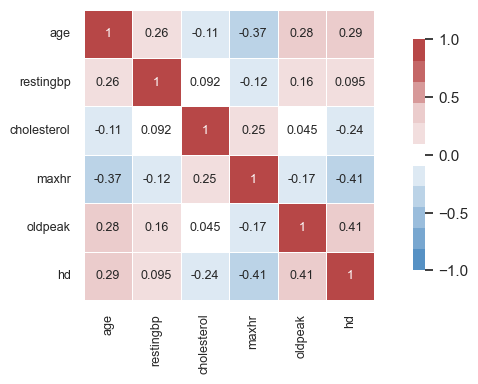

In [46]:
corr_matrix_plot(df=data,
                 variables=variables_corr,
                 figsize=(5,5))

#### Multicollinearity (VIF)

In [47]:
# using x_train dataset for VIF calculating
data_vif = data.loc[:, data.columns != 'hd'].copy()

# OneHot encoding for VIF
data_vif_oh = pd.get_dummies(data_vif, drop_first=1)

# MinMax scaling for VIF
data_vif_oh_minmax = MinMaxScaler(feature_range = (0,1)).fit_transform(data_vif_oh)
data_vif_oh_minmax = pd.DataFrame(data_vif_oh_minmax, index=data_vif_oh.index, columns=data_vif_oh.columns)

vif(data_vif_oh_minmax.columns, data_vif_oh_minmax)

,VIF,Tolerance
st_slope_Up,5.848421,0.170986
st_slope_Flat,4.826119,0.207206
restingecg_Normal,1.794861,0.557146
restingecg_ST,1.751063,0.571082
exerciseangina_Y,1.606754,0.622373
maxhr,1.541067,0.648901
oldpeak,1.522949,0.656621
chestpaintype_ATA,1.504765,0.664556
age,1.388794,0.720049
chestpaintype_NAP,1.259088,0.794226


### Skewness

In [48]:
def skewness(df):

    df = pd.DataFrame(df.skew(numeric_only=True),
                      columns=['Skewness'],
                      index=None)

    df['Highly skewed'] = (abs(df['Skewness']) > 0.5)
    df['abs'] = abs(df['Skewness'])

    df = df.sort_values(by=['abs', 'Highly skewed'], ascending=False)
    df = df.drop('abs', axis=1)

    return df

In [49]:
df_skewness = skewness(data[features_quantitative])

In [50]:
df_skewness

,Skewness,Highly skewed
oldpeak,1.049904,True
cholesterol,-0.675235,True
age,-0.192492,False
maxhr,-0.173750,False
restingbp,0.116804,False


### Kurtosis

In [51]:
def kurtosis(df):

    df = pd.DataFrame(df.kurtosis(numeric_only=True),
                      columns=['Kurtosis'],
                      index=None)
    df['Type'] = np.nan

    df.loc[df['Kurtosis'] > 1, 'Type'] = 'Too Peaked'
    df.loc[df['Kurtosis'] < -1, 'Type'] = 'Too Flat'
    df.loc[(df['Kurtosis'] <= 1) & (df['Kurtosis'] >= -1), 'Type'] = 'Normal'
    
    df['abs'] = abs(df['Kurtosis'])
    df = df.sort_values(by=['abs', 'Type'], ascending=False)
    df = df.drop('abs', axis=1)

    return df

In [52]:
df_kurtosis = kurtosis(data[features_quantitative])

In [53]:
df_kurtosis

,Kurtosis,Type
restingbp,3.514481,Too Peaked
oldpeak,1.316266,Too Peaked
maxhr,-0.448465,Normal
age,-0.389056,Normal
cholesterol,0.006184,Normal


## 2. Imputing Missing data

### Filling NaNs

Feature Engineering Handbook _01

In [54]:
df_missing_data

,Type,Count,Unique,Missing,Percentages
age,int64,826,48,0,0
restingbp,int64,826,64,0,0
cholesterol,int64,826,212,0,0
maxhr,int64,826,116,0,0
hd,int64,826,2,0,0
oldpeak,float64,826,51,0,0
sex,object,826,2,0,0
chestpaintype,object,826,4,0,0
fastingbs,object,826,2,0,0
restingecg,object,826,3,0,0


### Filling Zero Values

In [55]:
def plot_data_cleaned(df_raw, df_cleaned, variable, xlim, ylim):

    df_raw_describe = df_raw[variable] \
                        .describe() \
                        .to_frame().T \
                        .rename(index={variable: 'before cleaning'})
    
    df_cleaned_describe = df_cleaned[variable] \
                            .describe() \
                            .to_frame().T \
                            .rename(index={variable: 'after cleaning'})
    
    df_describe = pd.concat([df_raw_describe,
                             df_cleaned_describe], axis=0)
    
    display(df_describe)
    f, ax = plt.subplots(1, 2, figsize=(13, 4))
    f.suptitle(variable.title(), fontsize=12, weight='bold')

    plt.setp(ax, xlim=(0, xlim), ylim=(0, ylim))

    sns.histplot(
        data=df_raw, x=variable,
        kde=True, ax=ax[0], alpha=0.6
    )
    
    ax[0].tick_params(axis='both', which='major', labelsize=9)
    ax[0].set_ylabel('Count', fontsize=10, weight='bold')
    ax[0].set(xlabel=None)
    
    sns.histplot(
        data=df_cleaned, x=variable,
        kde=True, ax=ax[1], alpha=0.6
    )
    
    ax[1].tick_params(axis='both', which='major', labelsize=9)
    ax[1].set_ylabel('Count', fontsize=10, weight='bold')
    ax[1].set(xlabel=None)

    plt.show()

#### KNeighborsRegressor for MICE

Multivariate imputation by chained equations (MICE) is a multiple imputation technique that models each variable with missing values as a function of the remaining variables and uses that estimate for imputation.

MICE has the following basic steps:

1. A simple univariate imputation is performed for every variable with missing data, for example, median imputation.
2. One specific variable is selected, say, var_1, and the missing values are set back to missing.
3. A model that's used to predict var_1 is built based on the remaining variables in the dataset.
4. The missing values of var_1 are replaced with the new estimates.
5. Repeat step 2 to step 4 for each of the remaining variables.

In [56]:
# features, that can't contain zero values
features_nozero = ['age', 'restingbp', 'cholesterol', 'maxhr']

In [57]:
# create copy of data dataset with zero values
# use it for algorithm correctness validation later
data_w_zeroes = data[features_quantitative].copy()

In [58]:
for feature in features_nozero:
    # filling i variable zero values by NaN
    data.loc[data[feature] == 0, feature] = np.nan

In [59]:
# create dataset with no outliers and nans
# use it to fit imputer
data_knn = data.copy()
data_knn = data_knn.dropna()

In [60]:
imputer = IterativeImputer(
    estimator=KNeighborsRegressor(n_neighbors=5),
    missing_values=np.nan,
    initial_strategy='median',
    max_iter=100,
    tol=0.1,
    random_state=seed
)

In [61]:
imputer.fit(data_knn[features_quantitative]);

In [62]:
data[features_quantitative] = imputer.transform(data[features_quantitative])

#### Validation and Results Visualization

,count,mean,std,min,25%,50%,75%,max
before cleaning,826.0,197.809927,108.421172,0.0,173.25,222.0,267.0,603.0
after cleaning,826.0,244.465860,52.727457,85.0,211.25,239.2,272.3,603.0


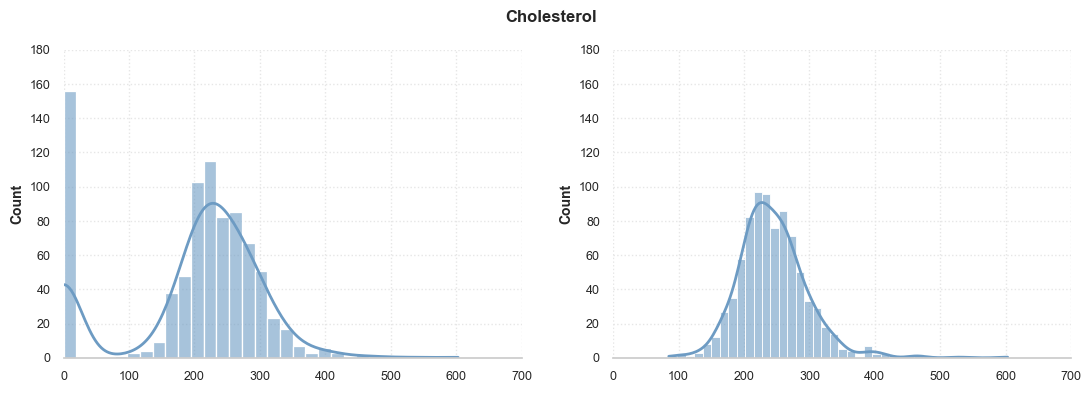

In [63]:
plot_data_cleaned(data_w_zeroes, data, 'cholesterol', xlim=700, ylim=180)

,count,mean,std,min,25%,50%,75%,max
before cleaning,826.0,132.530266,18.449924,0.0,120.0,130.0,140.0,200.0
after cleaning,826.0,132.679903,17.865719,80.0,120.0,130.0,140.0,200.0


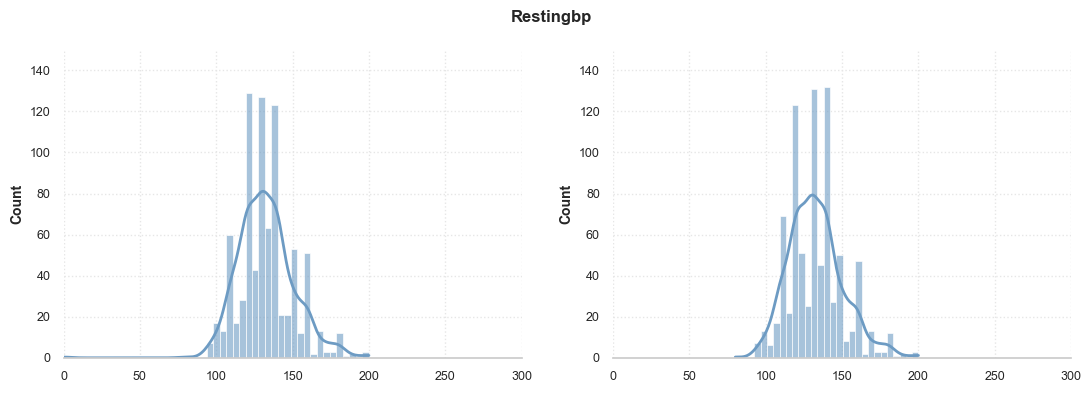

In [64]:
plot_data_cleaned(data_w_zeroes, data, 'restingbp', xlim=300, ylim=150)

## 3. Handling Outliers

In [65]:
def plot_outliers(df, outliers_df, features_outliers, scale=scale):

    for column in features_outliers:

        column_index = features_outliers.index(column)
        plt.figure(figsize=(6, 1))
        
        ax = sns.boxplot(
            data=df[column].values, orient='h', 
            color=palette[column_index], width=0.5, whis=scale)
        
        ax.tick_params(axis='x', which='major', labelsize=9)
        ax.set_yticks([])
        ax.set_title(column.title(), fontsize=10, weight='bold')
        
        plt.show()
        
    display(outliers_df)

In [66]:
outliers_df, boundaries_dict  = df_outliers_create(data, features_quantitative, scale=scale, boundaries=True)

In [67]:
lower_row = outliers_df.loc['Lower Outliers']
upper_row = outliers_df.loc['Upper Outliers']

features_outliers = [column for column in outliers_df.columns if 
                        lower_row[column] != 0 or upper_row[column] != 0]

In [68]:
features_outliers

['restingbp', 'cholesterol', 'maxhr', 'oldpeak']

In [69]:
# cholesterol boundaries for later validation
lower_boundary_chol = outliers_df.loc['Lower Fence', 'cholesterol']
upper_boundary_chol = outliers_df.loc['Upper Fence', 'cholesterol']

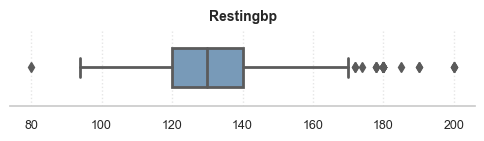

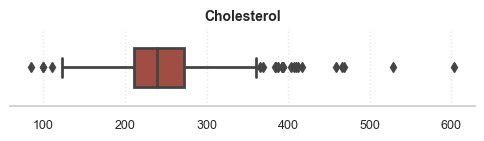

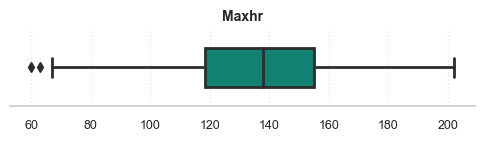

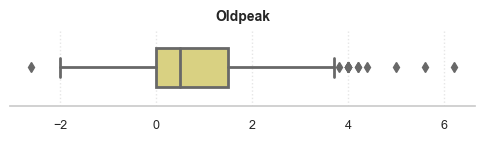

,age,restingbp,cholesterol,maxhr,oldpeak
Count,826.0,826.0,826.00,826.00,826.00
Outliers,0.0,25.0,23.00,2.00,15.00
Lower Outliers,0.0,1.0,4.00,2.00,1.00
Upper Outliers,0.0,24.0,19.00,0.00,14.00
Lower Fence,27.5,90.0,119.68,63.12,-2.25
Upper Fence,79.5,170.0,363.87,210.12,3.75
Q25,47.0,120.0,211.25,118.25,0.00
Q75,60.0,140.0,272.30,155.00,1.50
IQR,13.0,20.0,61.05,36.75,1.50
Scale,1.5,1.5,1.50,1.50,1.50


In [70]:
plot_outliers(data, outliers_df, features_outliers, scale=scale)

In [71]:
# count boundaries and replace outliers by np.nan
for feature in features_quantitative:
    
    lower_boundary = boundaries_dict[feature][0]
    upper_boundary = boundaries_dict[feature][1]
    
    data.loc[(data[feature] < lower_boundary) | \
                   (data[feature] > upper_boundary), feature] = np.nan

In [72]:
data[features_quantitative] = imputer.transform(data[features_quantitative])

In [73]:
# check if still there are values of cholesterol out or boundaries
data[data['cholesterol'] > upper_boundary_chol].shape

(0, 12)

In [74]:
# check if still there are values of cholesterol out or boundaries
data.loc[data['cholesterol'] < lower_boundary_chol].shape

(0, 12)

## 4. Scaling Quantitative Variables

### StandardScaler

In [75]:
scaler = StandardScaler()
# scaler = RobustScaler()
# scaler = MinMaxScaler()

In [76]:
scaler.fit(data[features_quantitative])

StandardScaler()

In [77]:
data[features_quantitative] = scaler.transform(data[features_quantitative])

## 5. Encoding Categorical Variables

### WoE Encoder

In [78]:
encoder = WoEEncoder()

In [79]:
encoder.fit(data[features_categorical], data[features_target])

WoEEncoder()

In [80]:
data[features_categorical] = encoder.transform(data[features_categorical])

In [81]:
data.head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,hd
557,0.269421,0.333146,-0.763139,0.348501,-0.772829,1.187091,0.392474,-0.580212,1.551734,0.991941,1.370569,1
260,-0.798951,0.333146,-2.167419,0.540272,0.762983,-0.299917,-0.143853,1.139384,1.551734,-0.877094,-1.642656,0
235,-1.546811,0.333146,-2.167419,-0.738204,-0.956209,-0.299917,-0.143853,0.939431,1.551734,0.161259,1.370569,0
218,0.162584,0.333146,-2.167419,0.540272,-1.047900,-0.299917,-0.143853,0.539525,-0.861767,-0.877094,-1.642656,0
382,-1.119462,0.333146,1.069308,-1.057823,-0.364807,-0.299917,-0.143853,0.339572,1.551734,1.199612,1.370569,1


## 6. Transformation Pipeline

In [82]:
def pipeline_transformation(dataframe, features_quantitative, features_categorical, features_nozero,
                          imputer, scaler, encoder):
    
    df = dataframe.copy()
    features_quantitative = features_quantitative.copy()
    features_categorical = features_categorical.copy()
    
    df.loc[df['fastingbs'] == 1, 'fastingbs'] = 'Yes'
    df.loc[df['fastingbs'] == 0, 'fastingbs'] = 'No'
    
    # preaparing data for zero imputer
    for feature in features_nozero:
        df.loc[df[feature] == 0, feature] = np.nan
    
    # replace zero values
    df[features_quantitative] = imputer.transform(df[features_quantitative])
    
    # preparing data for outliers imputer
    for feature in features_quantitative:
    
        q25, q75 = np.percentile(df[feature], [25,75])
        iqr = q75 - q25
        lower_boundary = q25 - (scale * iqr)
        upper_boundary = q75 + (scale * iqr)

        df.loc[(df[feature] < lower_boundary) | \
                       (df[feature] > upper_boundary), feature] = np.nan
    
    # replace outliers
    df[features_quantitative] = imputer.transform(df[features_quantitative])
    
    df[features_quantitative] = scaler.transform(df[features_quantitative])
    df[features_categorical] = encoder.transform(df[features_categorical])
    
    return df

### Checking the Correctness of Pipeline

In [83]:
data_check = data_train.copy()

In [84]:
data_check = pipeline_transformation(
    dataframe=data_check, 
    features_quantitative=features_quantitative,
    features_categorical=features_categorical,
    features_nozero=features_nozero,
    imputer=imputer,
    scaler=scaler,
    encoder=encoder
    )

In [85]:
# check correctness of pipeline by comparison data converted manually
# and data_check_transformed converted by pipeline
pipeline_check_list = []
for column in features_quantitative:
    pipeline_check_list.append(
        data[column].equals(data_check[column])
    )   
    
if False in pipeline_check_list: print('Pipeline is not correct')

### Transform Quantitative Variables of Train and Test Datasets

#### Variables Transformation

In [86]:
x_train = pipeline_transformation(
    dataframe=x_train, 
    features_quantitative=features_quantitative,
    features_categorical=features_categorical,
    features_nozero=features_nozero,
    imputer=imputer,
    scaler=scaler,
    encoder=encoder
    )

In [87]:
x_test = pipeline_transformation(
    dataframe=x_test, 
    features_quantitative=features_quantitative,
    features_categorical=features_categorical,
    features_nozero=features_nozero,
    imputer=imputer,
    scaler=scaler,
    encoder=encoder
    )

## 7. Models Evaluation

In [88]:
def reset_seeds(seed):

    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)


def model_evaluation(models_dict, x, y, random_state=seed):

    t_start = time.time()
    df = pd.DataFrame(columns=['Precision', 'Recall', 'F1 Score', 'Time'])

    for name, model in models_dict.items():
        
        model_t_start = time.time()
        
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=random_state)
        
        accuracy = cross_val_score(model, x, y, scoring='accuracy', cv=cv)
        precision = cross_val_score(model, x, y, scoring='precision', cv=cv)
        recall = cross_val_score(model, x, y, scoring='recall', cv=cv)
        f1_score = cross_val_score(model, x, y, scoring='f1_macro', cv=cv)

        model = None
        model_time = str(dt.timedelta(seconds=np.round(time.time() - model_t_start)))

        # adding new row in df
        df.loc[len(df)] = [
            np.round(np.mean(precision), 2),
            np.round(np.mean(recall), 2),
            np.round(np.mean(f1_score), 2),
            model_time
        ]

    df.index = models_dict

    execution_time_sec = np.round(time.time() - t_start, 2)
    execution_time_hours = str(dt.timedelta(seconds=np.round(time.time() - t_start)))
        
    print('Execution time (seconds): {}'.format(execution_time_sec, '\n'))
    print('Execution time: {}'.format(execution_time_hours))
    
    return df

### Models to evaluate:

- **Linear:** LR: Logistic Regression

- **CART:** RF: Random Forest

- **Boosting:** LGB: LightGBM

In [89]:
models_dict = {
    'LR': LogisticRegression(random_state=seed),
    'RF': RandomForestClassifier(random_state=seed),
    'LGB': LGBMClassifier(objective='binary', random_state=seed)
}

In [90]:
evaluation_results = model_evaluation(models_dict, x_train, y_train)

Execution time (seconds): 42.89
Execution time: 0:00:43


In [91]:
evaluation_results

,Precision,Recall,F1 Score,Time
LR,0.86,0.88,0.85,0:00:01
RF,0.86,0.89,0.86,0:00:31
LGB,0.86,0.88,0.85,0:00:11


## 8. Hyperparameters Tuning and Model Selection

In [92]:
def hyperparameters_tuning(x_train, y_train, clf, scoring, search, params, 
                    searching_time=True, show_clf=True):

    if search == 'random':
        
        cv = RandomizedSearchCV(estimator=clf,
                                param_distributions=params,
                                scoring=scoring,
                                cv=5,
                                random_state=42)

        t_start = time.time()

        cv.fit(x_train, y_train)

        best_estimator = cv.best_estimator_

        t_end = time.time()
        t_time = str(dt.timedelta(seconds=np.round(t_end - t_start)))

        if searching_time:
            print('Time for hyperparameters searching: {}'.format(t_time), '\n')
        
        if show_clf:
            print(cv.best_estimator_, '\n')

        return best_estimator

    if search == 'grid':
        
        cv = GridSearchCV(estimator=clf,
                          param_grid=params,
                          scoring=scoring,
                          cv=5)

        t_start = time.time()

        cv.fit(x_train, y_train)

        best_estimator = cv.best_estimator_

        t_end = time.time()
        t_time = str(dt.timedelta(seconds=np.round(t_end - t_start)))

        if searching_time:
            print('Time for hyperparameters searching: {}'.format(t_time), '\n')
        
        if show_clf:
            print(cv.best_estimator_, '\n')

        return best_estimator

    clf = None
    cv = None
   
  
def best_estimators_search(models_dict, params_dict, x, y, 
                           hyper_func=hyperparameters_tuning, execution_time=True):
    
    t_start = time.time()
    
    best_estimators_dict = dict.fromkeys(models_dict.keys(), [])
    
    models = models_dict.values()
    params = params_dict.values()
    
    for name, model, param in zip(models_dict, models, params):
        
        best_estimator = hyperparameters_tuning(
            x, y,
            clf=model,
            scoring='precision',
            search='random',
            params=param, 
            searching_time=False,
            show_clf=False
        )
        
        best_estimators_dict[name] = best_estimator
    
    if execution_time:
        
        execution_time_sec = np.round(time.time() - t_start, 2)
        execution_time_hours = str(dt.timedelta(seconds=np.round(time.time() - t_start)))

        print('Execution time (seconds): {}'.format(execution_time_sec, '\n'))
        print('Execution time: {}'.format(execution_time_hours))
        
    
    return best_estimators_dict


def class_report(y_test, y_pred, name, plot=True):

    report_dict = classification_report(y_test,
                                         y_pred,
                                         target_names=['0', '1'],
                                         output_dict=True)

    if plot: 
    
        plt.subplots(figsize=(6.5, 2.2))
        
        sns.heatmap(pd.DataFrame(report_dict).iloc[:-1, :].T,
                    cmap=clf_report,
                    annot_kws={'size': 9.5},
                    cbar_kws={'shrink': 1},
                    annot=True,
                    xticklabels=['Precision', 'Recall', 'F1-Score'],
                    yticklabels=['HD: 0', 'HD: 1', 'Accuracy', 'Macro Avg', 'Weighted Avg'],
                    vmin=0.85, vmax=0.95)

        plt.xticks(size=9)
        plt.yticks(size=9)
        plt.xticks(rotation=0)
        plt.yticks(rotation=0)
        plt.title('{}'.format(name), fontsize=12, weight='bold', y=1.05)

        # plt.savefig('classification_report.png')

        plt.show()
    
    return report_dict


def summary_report(y_test, y_pred, clf, name, report_show=True, matrix_show=True):
    
    report_dict = class_report(
                    y_test, y_pred,
                    name=name, plot=report_show
                )
    
    if matrix_show:
        conf_matrix(y_test, y_pred)

In [93]:
params_lr = {
    'tol': [0.1, 0.01, 0.001, 0.0001],
    'C': [100, 30, 20, 10, 5, 1, 0.1, 0.01],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

params_rf = {
    'n_estimators': [5, 35, 50, 100, 150, 200, 250, 300, 350],
    'max_depth': [2, 4, 6, 8, 10, 15, 20],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [2, 4, 6, 8, 10]
}

params_lgb = {
    'num_leaves': [2, 9, 38, 151, 602],
    'max_depth': [2, 4, 6, 8, 10],
    'learning_rate': [0.1, 0.05, 0.01, 0.005, 0.001, 0.0001],
    'n_estimators': [5, 35, 50, 100, 150, 200, 250, 300, 350],
    'min_child_samples': [5, 10, 20, 50, 100, 150, 200, 300, 500]
}

In [94]:
params_dict = {
    'LR': params_lr,
    'RF': params_rf,
    'LGB': params_lgb
}

In [95]:
best_estimators_dict = best_estimators_search(
    models_dict, params_dict,
    x_train, y_train,
    hyperparameters_tuning,
    execution_time=True
)

Execution time (seconds): 27.27
Execution time: 0:00:27


In [96]:
clf_lr = best_estimators_dict['LR']
clf_rf = best_estimators_dict['RF']
clf_lgb = best_estimators_dict['LGB']

In [97]:
clf_lr.fit(x_train, y_train)

LogisticRegression(C=20, random_state=42, solver='sag')

In [98]:
clf_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_estimators=200,
                       random_state=42)

In [99]:
clf_lgb.fit(x_train, y_train)

LGBMClassifier(max_depth=4, min_child_samples=10, num_leaves=9,
               objective='binary', random_state=42)

In [100]:
y_pred_lr = clf_lr.predict(x_test)
y_pred_prob_lr = clf_lr.predict_proba(x_test)

y_pred_rf = clf_rf.predict(x_test)
y_pred_prob_rf = clf_rf.predict_proba(x_test)

y_pred_lgb = clf_lgb.predict(x_test)
y_pred_prob_lgb = clf_lgb.predict_proba(x_test)

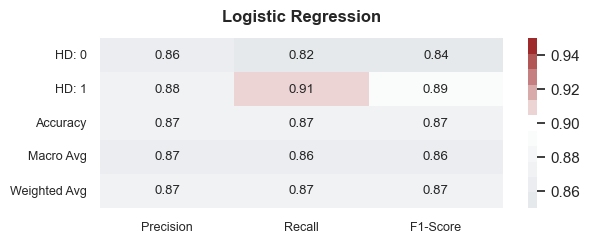

In [101]:
summary_report(
    y_test, y_pred_lr,
    clf_lr, name='Logistic Regression',
    report_show=True, matrix_show=False
)

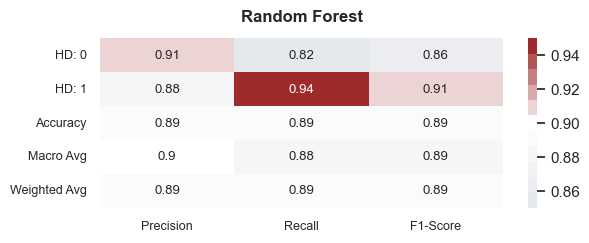

In [102]:
summary_report(
    y_test, y_pred_rf,
    clf_rf, name='Random Forest',
    report_show=True, matrix_show=False
)

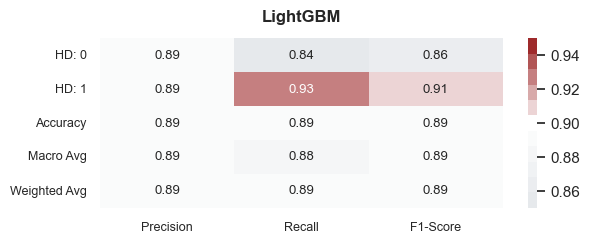

In [103]:
summary_report(
    y_test, y_pred_lgb,
    clf_lgb, name='LightGBM',
    report_show=True, matrix_show=False
)

## 9. Precision-Recall Trade-off

In [104]:
def prec_rec(y_test, y_pred, y_pred_prob):

    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    # calculate f_score
    f = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f_score
    x = np.argmax(f)
    # calculate best recall, precision
    precision_opt = round(precision[x], 2)
    recall_opt = round(recall[x], 2)
    threshold_opt = round(thresholds[x], 2)

    plt.figure(figsize=(6, 4))
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title('Precision-Recall Curve', fontsize=15, y=1.05)

    plt.plot(recall,
             precision)
    
    plt.plot(recall_opt,
             precision_opt,
             marker='o',
             markersize=10,
             label='Precision-Recall Optimal Threshold',
             fillstyle='none',
             color='k',
             mew=1.7)

    plt.xticks(size=9)
    plt.yticks(size=9)
    plt.legend(loc='best', fontsize=10)
    # plt.savefig('roc_auc.png')
    
    plt.show()

    return precision_opt, recall_opt, threshold_opt


def threshold_range(y_test, y, lower=0.2, upper=0.5, step=0.05, kind='prob'):

    arr = np.arange(lower, upper, step)
    df = pd.DataFrame(columns=['threshold', 'precision', 'recall', 'f1_score'])

    if kind == 'prob':
        
        for i in arr:
            y_pred_lower_threshold = np.where(y[:, 1] >= i, 1, 0)
            p = precision_score(y_test, y_pred_lower_threshold).round(2)
            r = recall_score(y_test, y_pred_lower_threshold).round(2)
            f1 = f1_score(y_test, y_pred_lower_threshold).round(2)

            l = [i, p, r, f1]
            df.loc[len(df)] = l

        return df

    if kind == 'func':
        
        for i in arr:
            y_pred_lower_threshold = np.where(y >= i, 1, 0)
            p = precision_score(y_test, y_pred_lower_threshold).round(2)
            r = recall_score(y_test, y_pred_lower_threshold).round(2)
            f1 = f1_score(y_test, y_pred_lower_threshold).round(2)

            j = round(i, 4)

            l = [j, p, r, f1]
            df.loc[len(df)] = l

        return df


def conf_matrix(y, y_pred):

    fig, ax = plt.subplots(figsize=(5.62, 1.5))

    ax = sns.heatmap(confusion_matrix(y, y_pred),
                     cmap=gradient_grey,
                     annot_kws={'size': 10},
                     cbar_kws={'shrink': 1},
                     annot=True,
                     xticklabels=['NO', 'YES'],
                     yticklabels=['NO', 'YES'],
                     cbar=False,
                     fmt='g')

    plt.xticks(size=9)
    plt.yticks(size=9)
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    # plt.title('Confusion Matrix', fontsize=12, weight='bold', y=1.1)

    ax.set_ylabel('Actual', fontsize=10, weight='bold')
    ax.set_xlabel('Predicted', fontsize=10, weight='bold')

    # plt.savefig('classification_report.png')

    plt.show()

### Logistic Regression

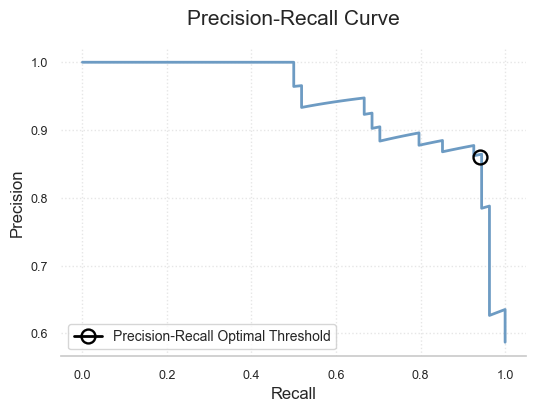

In [105]:
lr_precision_opt, lr_recall_opt, lr_threshold_opt = prec_rec(y_test,
                                                             y_pred_lr,
                                                             y_pred_prob_lr[:, 1])

In [106]:
lr_precision_opt, lr_recall_opt, lr_threshold_opt

(0.86, 0.94, 0.36)

In [107]:
threshold_range(y_test,
                y_pred_prob_lr,
                lower=0,
                upper=0.55,
                step=0.05,
                kind='prob')

,threshold,precision,recall,f1_score
0,0.00,0.59,1.00,0.74
1,0.05,0.67,0.96,0.79
2,0.10,0.72,0.96,0.83
3,0.15,0.76,0.96,0.85
4,0.20,0.78,0.94,0.86
5,0.25,0.81,0.94,0.87
6,0.30,0.84,0.94,0.89
7,0.35,0.85,0.94,0.89
8,0.40,0.88,0.91,0.89
9,0.45,0.88,0.91,0.89


In [108]:
threshold_lr = 0.15

In [109]:
y_pred_lr = (y_pred_prob_lr[:, 1] >= threshold_lr).astype('float64')

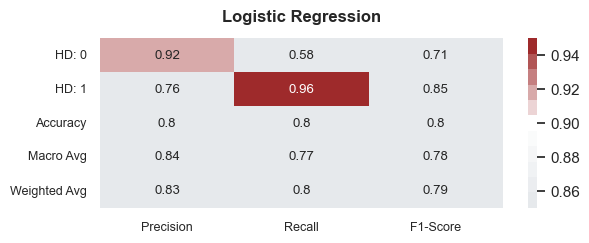

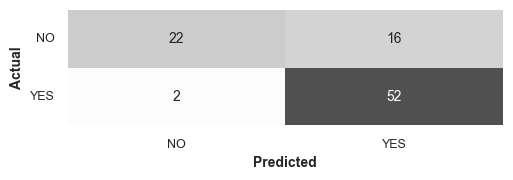

In [110]:
summary_report(
    y_test, y_pred_lr,
    clf_lr, name='Logistic Regression',
    report_show=True, matrix_show=True
)

### Random Forest

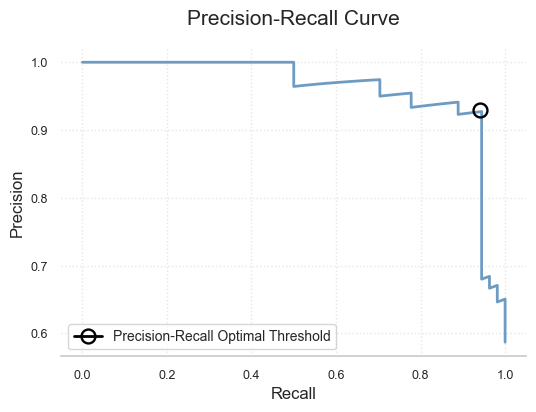

In [111]:
rf_precision_opt, rf_recall_opt, rf_threshold_opt = prec_rec(y_test,
                                                             y_pred_rf,
                                                             y_pred_prob_rf[:, 1])

In [112]:
rf_precision_opt, rf_recall_opt, rf_threshold_opt

(0.93, 0.94, 0.59)

In [113]:
threshold_range(y_test,
                y_pred_prob_rf,
                lower=0,
                upper=0.55,
                step=0.05,
                kind='prob')

,threshold,precision,recall,f1_score
0,0.00,0.59,1.00,0.74
1,0.05,0.65,0.98,0.78
2,0.10,0.67,0.96,0.79
3,0.15,0.72,0.94,0.82
4,0.20,0.75,0.94,0.84
5,0.25,0.80,0.94,0.86
6,0.30,0.80,0.94,0.86
7,0.35,0.84,0.94,0.89
8,0.40,0.86,0.94,0.90
9,0.45,0.86,0.94,0.90


In [114]:
threshold_rf = 0.59

In [115]:
y_pred_rf = (y_pred_prob_rf[:, 1] >= threshold_rf).astype('float64')

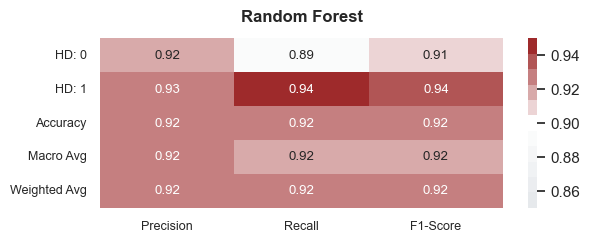

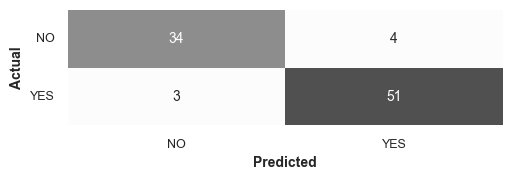

In [116]:
summary_report(
    y_test, y_pred_rf,
    clf_rf, name='Random Forest',
    report_show=True, matrix_show=True
)

### LightGBM

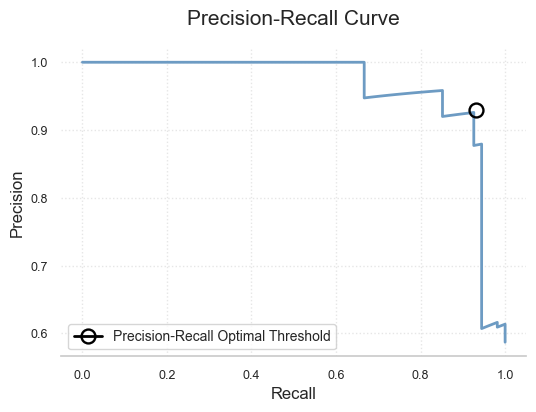

In [117]:
lgb_precision_opt, lgb_recall_opt, lgb_threshold_opt = prec_rec(y_test,
                                                                y_pred_lgb,
                                                                y_pred_prob_lgb[:, 1])

In [118]:
lgb_precision_opt, lgb_recall_opt, lgb_threshold_opt

(0.93, 0.93, 0.53)

In [119]:
threshold_range(y_test,
                y_pred_prob_lgb,
                lower=0,
                upper=0.55,
                step=0.05,
                kind='prob')

,threshold,precision,recall,f1_score
0,0.00,0.59,1.00,0.74
1,0.05,0.67,0.94,0.78
2,0.10,0.75,0.94,0.84
3,0.15,0.81,0.94,0.87
4,0.20,0.81,0.94,0.87
5,0.25,0.86,0.94,0.90
6,0.30,0.86,0.94,0.90
7,0.35,0.86,0.94,0.90
8,0.40,0.88,0.94,0.91
9,0.45,0.88,0.94,0.91


In [120]:
threshold_lgb = 0.4

In [121]:
y_pred_lgb = (y_pred_prob_lgb[:, 1] >= threshold_lgb).astype('float64')

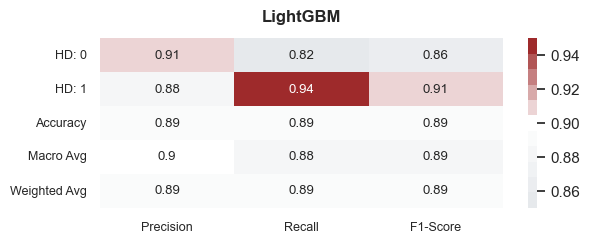

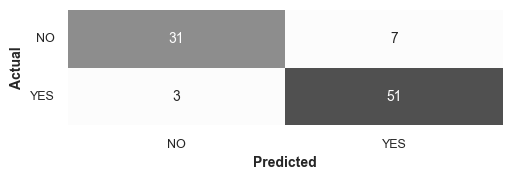

In [122]:
summary_report(
    y_test, y_pred_lgb,
    clf_lgb, name='LightGBM',
    report_show=True, matrix_show=True
)

### Neural Network

In [123]:
def neural_network_create(layers, neurons, lr=0.001, drop=0.2, input_shape=None):

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=input_shape,
                                    name='input'))

    for layer in range(layers):
        model.add(tf.keras.layers.Dense(units=neurons,
                                        activation='selu'))
        model.add(tf.keras.layers.Dropout(drop))

    model.add(tf.keras.layers.Dense(units=1,
                                    activation='sigmoid',
                                    name='output'))

    model.compile(optimizer=tf.optimizers.Adam(learning_rate=lr),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=[tf.keras.metrics.Recall()])

    return model


def plot_neural_network_history(history):

    pd.DataFrame(history.history).plot(figsize=(10, 6))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()


def neural_network_fit(model, x_train, y_train, last=False, graph=False, early_stopping=None):

    history = model.fit(x_train,
                        y_train,
                        epochs=500,
                        validation_split=0.1,
                        verbose=0,
                        callbacks=early_stopping)

    if last is False:
        display(pd.DataFrame(history.history))
    else:
        display(pd.DataFrame(history.history).iloc[[-1]])
    if graph is True:
        plot_neural_network_history(history)

#### Model Selection

In [124]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=0,
    restore_best_weights=True
)

params = {'layers': 3,
          'neurons': 40,
          'lr': 0.001,
          'drop': 0,
          'input_shape': x_train.shape[1:]}

,loss,recall,val_loss,val_recall
27,0.261089,0.925121,0.495321,0.925


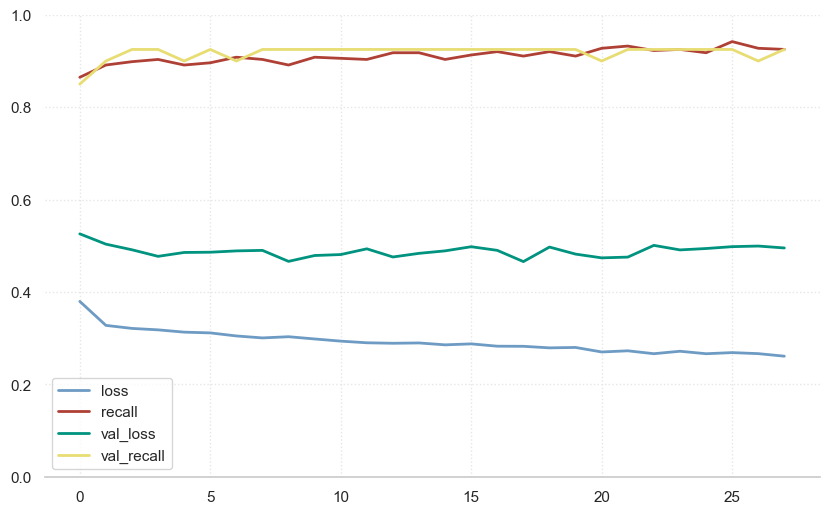

3/3 [==============================] - 0s 3ms/step


In [125]:
reset_seeds(seed)

clf_nn = neural_network_create(**params)
neural_network_fit(
    clf_nn,
    x_train,
    y_train,
    last=True,
    graph=True,
    early_stopping=early_stopping)

y_pred_prob_nn = np.concatenate(clf_nn.predict(x_test))
y_pred_nn = np.array([round(float(i), 0) for i in y_pred_prob_nn])

#### Precision-Recall Trade-off

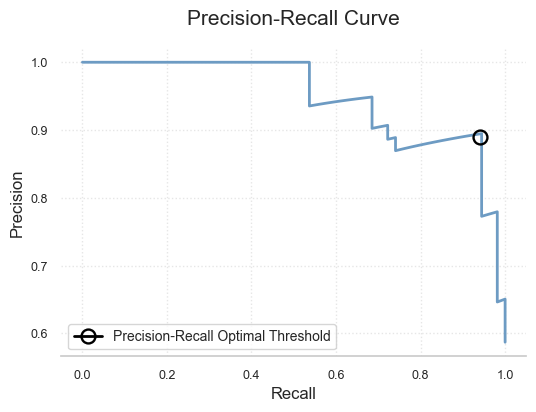

In [126]:
nn_precision_opt, nn_recall_opt, nn_threshold_opt = prec_rec(y_test,
                                                             y_pred_nn,
                                                             y_pred_prob_nn)

In [127]:
nn_precision_opt, nn_recall_opt, nn_threshold_opt

(0.89, 0.94, 0.51)

In [128]:
threshold_range(y_test,
                y_pred_prob_nn,
                lower=0,
                upper=0.55,
                step=0.05,
                kind='func')

,threshold,precision,recall,f1_score
0,0.00,0.59,1.00,0.74
1,0.05,0.71,0.98,0.82
2,0.10,0.77,0.98,0.86
3,0.15,0.77,0.94,0.85
4,0.20,0.84,0.94,0.89
5,0.25,0.85,0.94,0.89
6,0.30,0.85,0.94,0.89
7,0.35,0.85,0.94,0.89
8,0.40,0.88,0.94,0.91
9,0.45,0.88,0.94,0.91


In [129]:
threshold_nn = 0.1

In [130]:
y_pred_nn = (y_pred_prob_nn > threshold_nn).astype('float64')

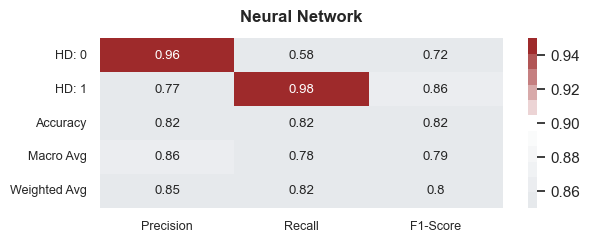

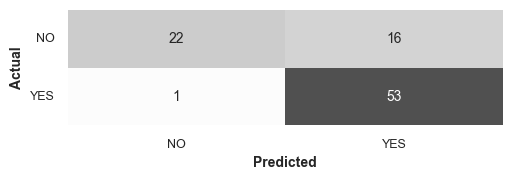

In [131]:
summary_report(
    y_test, y_pred_nn,
    clf_nn, name='Neural Network',
    report_show=True, matrix_show=True
)

#### Visualization

In [132]:
prob_df = pd.DataFrame(index=x_test.index)
prob_df['hd'] = y_test
prob_df['y_pred_prob'] = y_pred_prob_nn

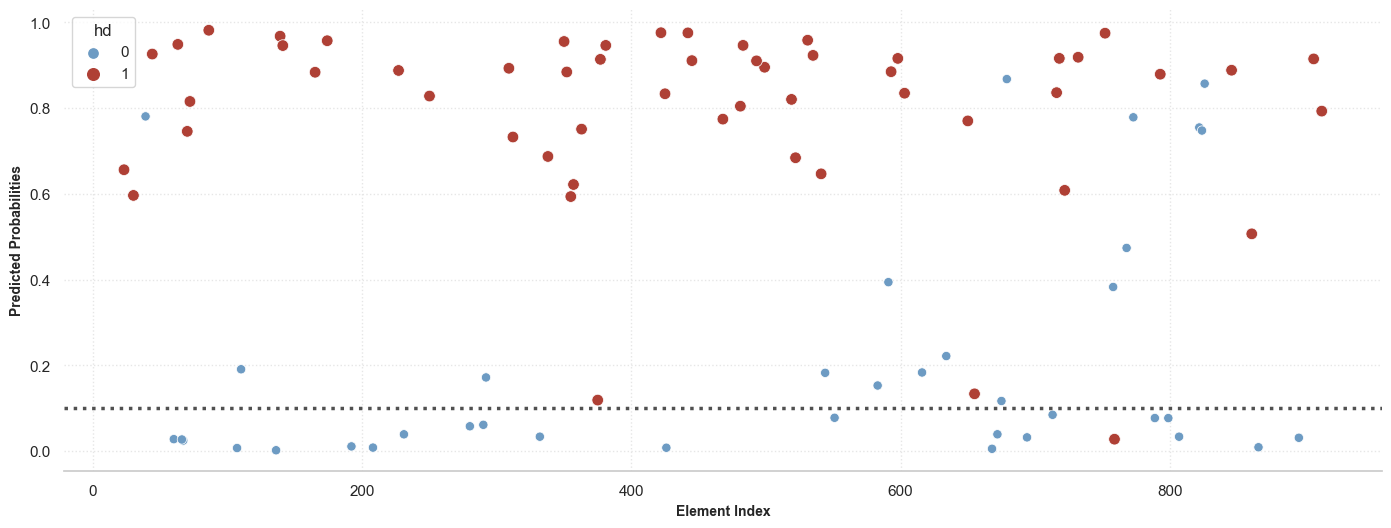

In [133]:
plt.subplots(figsize=(17, 6))

# plt.title('Neural Network Predicted Probabilities', fontsize=20, y=1.03)
plt.xlabel('Element Index', fontsize=10, weight='bold')
plt.ylabel('Predicted Probabilities', fontsize=10, weight='bold')

ax = sns.scatterplot(
    x=prob_df.index,
    y='y_pred_prob',
    hue='hd',
    size='hd',
    sizes=(70, 45),
    data=prob_df
)

ax.axhline(y=threshold_nn, ls=':', color=palette[9], linewidth=2.5)

plt.show()

## 10. Models Comparison

In [134]:
def summary(models_list, y_test, y_pred_list):

    df = pd.DataFrame(columns=['False Negative', 'False Positive', 'True Positive', 'True Negative'])

    for i in y_pred_list:
        tn, fp, fn, tp = confusion_matrix(y_test, i).ravel()
        df.loc[len(df)] = [fn, fp, tp, tn]
    df.index = models_list
    
    return df

In [135]:
models_list = ['Logistic Regression', 'Random Forest', 'LightGMB', 'Neural Network']

In [136]:
y_pred_list = [y_pred_lr, y_pred_rf, y_pred_lgb, y_pred_nn]

In [137]:
summary(models_list, y_test, y_pred_list)

,False Negative,False Positive,True Positive,True Negative
Logistic Regression,2,16,52,22
Random Forest,3,4,51,34
LightGMB,3,7,51,31
Neural Network,1,16,53,22


### Best Model

**Neural Network:**
- 3 hidden layers
- 40 neurons
- SELU activation
- 0.001 learning rate

In [138]:
clf_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                480       
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 40)                1640      
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense_2 (Dense)             (None, 40)                1640      
                                                                 
 dropout_2 (Dropout)         (None, 40)                0         
                                                                 
 output (Dense)              (None, 1)                 4

In [139]:
execution_time_sec = np.round(time.time() - time_start_script, 2)
execution_time_hours = \
    str(dt.timedelta(seconds=np.round(time.time() - time_start_script)))

print('Execution time (seconds): {}'.format(execution_time_sec, '\n'))
print('Execution time: {}'.format(execution_time_hours))

Execution time (seconds): 109.32
Execution time: 0:01:49
